# Bayesian Polynomial Curve Fitting: Sine Data Set

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Generate Sine Data Set

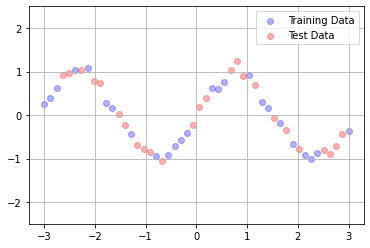

In [2]:
random.seed(0)
x = np.linspace(-3,3,50).reshape(-1,1)
y = np.sin(2*x) + 0.1*(np.random.randn(x.size,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

def plotData(X_train,X_test,y_train,y_test):
    plt.scatter(X_train,y_train,color='b',alpha=0.3,label='Training Data')
    plt.scatter(X_test,y_test,color='r',alpha=0.3,label='Test Data')
    plt.ylim([-2.5, 2.5])
    plt.grid()
    
plotData(X_train, X_test, y_train, y_test)
plt.legend()
plt.show()

## Sequential fitting using Bayesian Polynomial Regression

Setup the constants and finely separated x for plotting.

In [3]:
N = len(X_train)

# Permute rows of X_train randomly
new_indices = np.random.choice(N, N, replace=False)
X_train = X_train[new_indices]
y_train = y_train[new_indices]

# Set the constant values. Note: precision = 1/variance
a = 1          # alpha, precision of the weights, w
b = 15         # beta,  precision of the inputs, x
D = 7          # degree of polynomial to be fitted
M = D+1        # no. of parameters in the model

# No. of std devs for predictive distribution
n_std = 0.5

# Set up the polynomial basis functions
f = lambda x: [x**e for e in np.arange(M)]

X_fine = np.linspace(-4,4,200)
X_fine_design = np.hstack(f(X_fine.reshape(-1,1)))

Perform sequential fitting

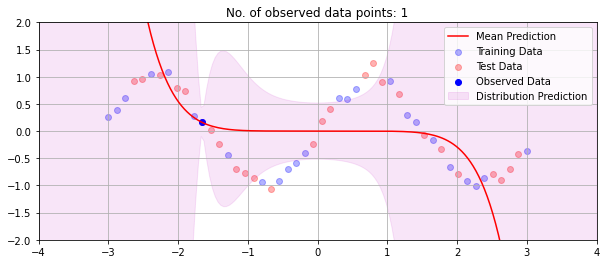

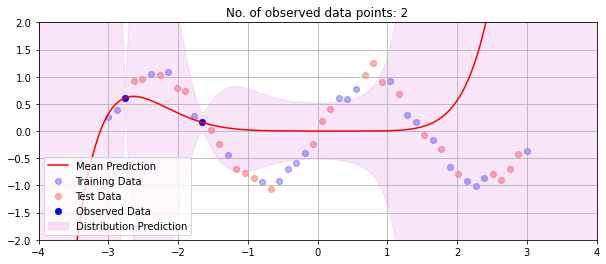

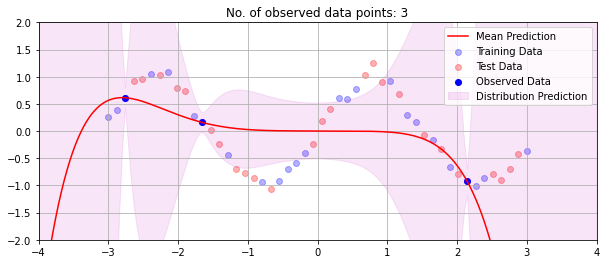

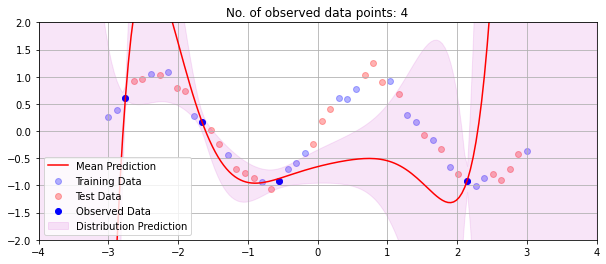

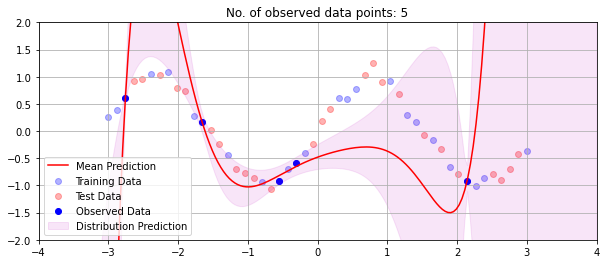

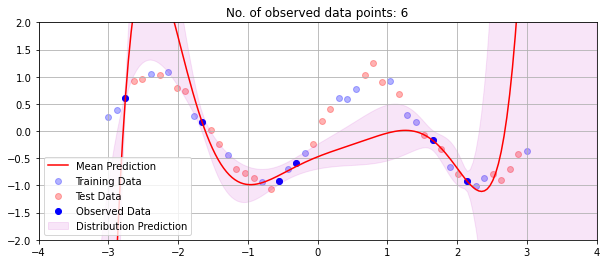

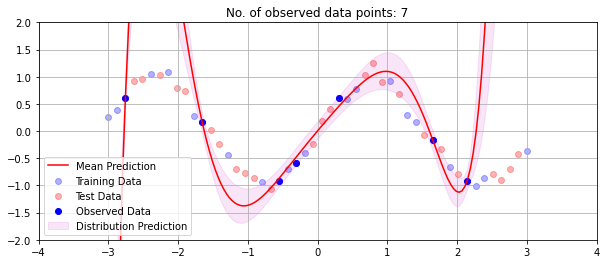

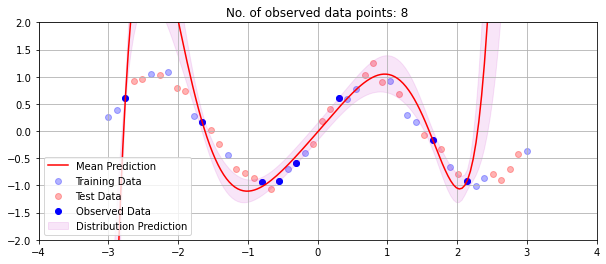

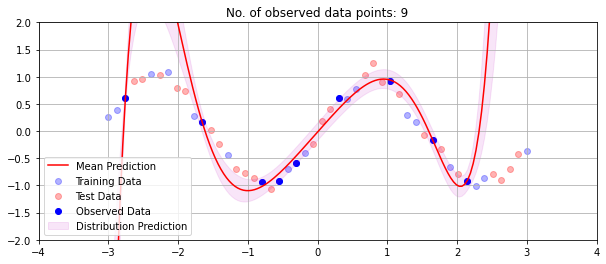

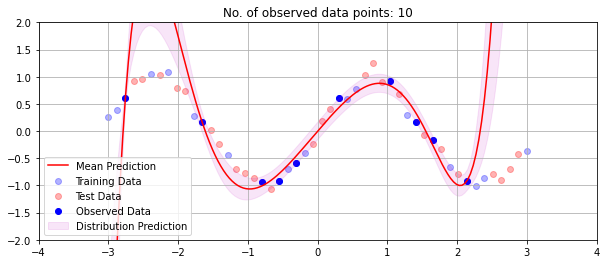

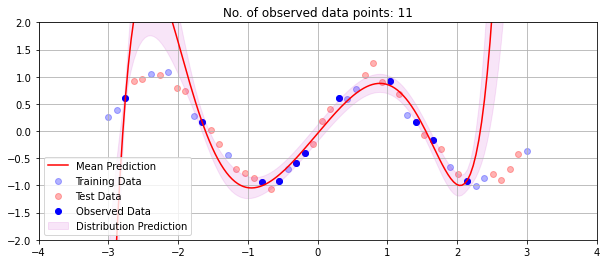

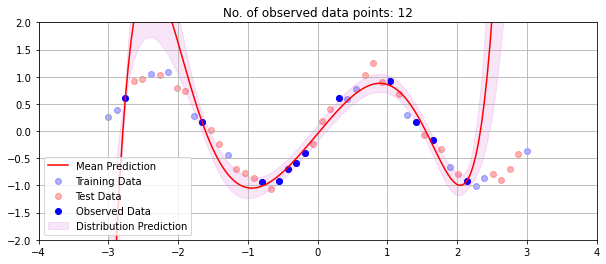

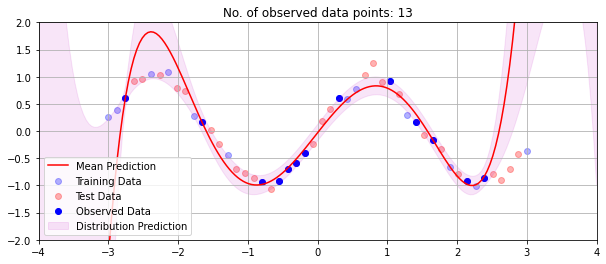

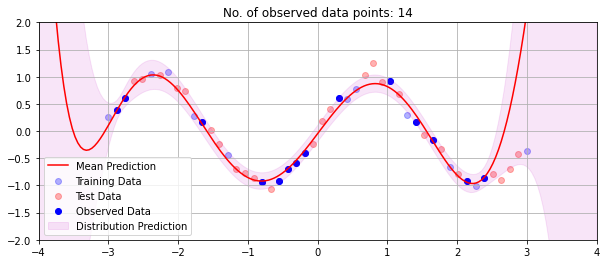

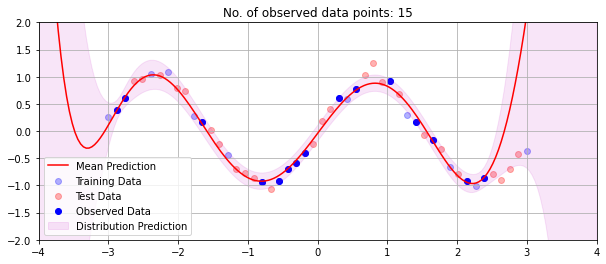

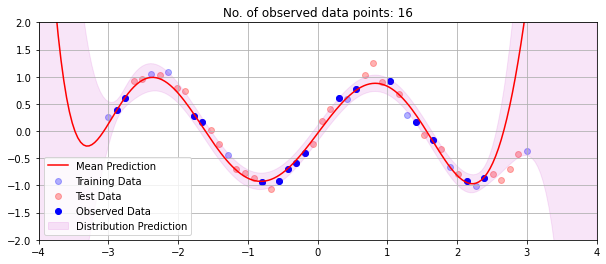

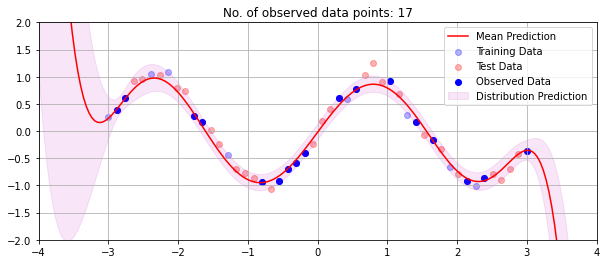

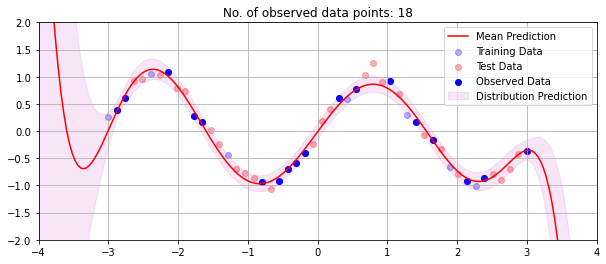

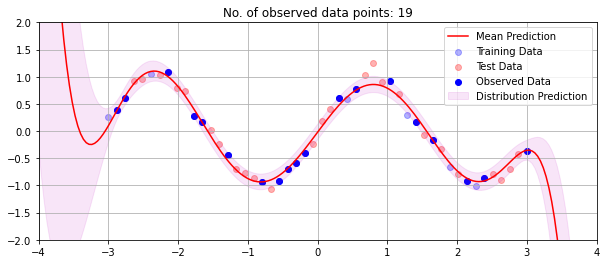

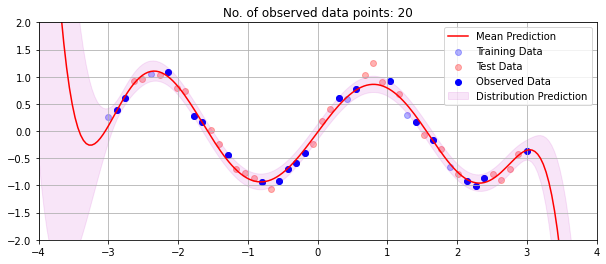

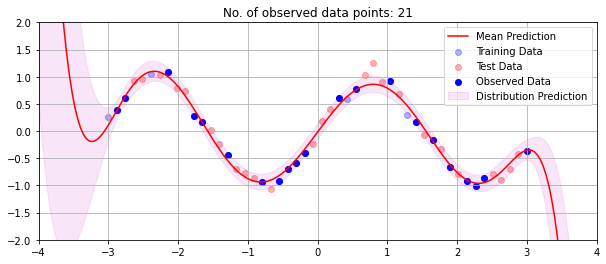

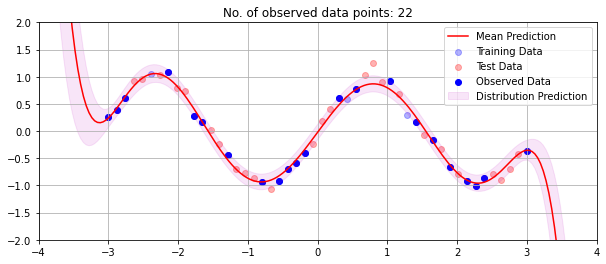

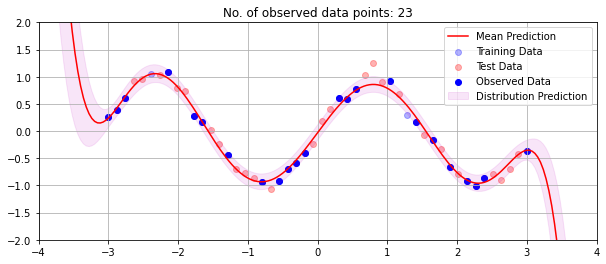

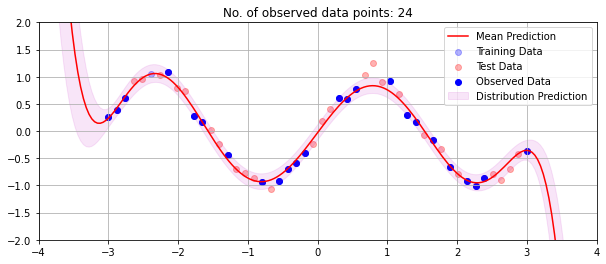

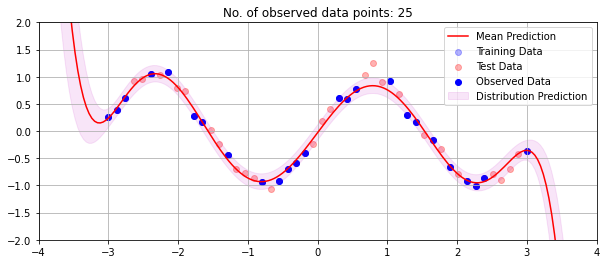

In [4]:
for i in range(N):
    X_design = np.hstack(f(X_train[:i+1].reshape(-1,1)))
    
    Sinv = np.linalg.inv(a * np.eye(M) + b * np.dot(X_design.T, X_design))
    xy = Sinv @ (X_design.T @ y_train[:i+1])
    
    mu = b * X_fine_design @ xy
    sd = 1/b + np.sum(np.dot(X_fine_design, Sinv) * X_fine_design, axis=1)
    
    plt.figure(figsize=(10,4))
    plotData(X_train, X_test, y_train, y_test)
    plt.scatter(X_train[:i+1], y_train[:i+1], 
                c='b', label='Observed Data')
    plt.plot(X_fine, mu, 'r', label='Mean Prediction')
    
    # Draw the filled uncertainty
    p1 = n_std * np.sqrt(sd.reshape(-1,1)) + mu
    p2 = -n_std * np.sqrt(sd.reshape(-1,1)) + mu
    plt.fill_between(X_fine, p1.ravel(), p2.ravel(), color='m', 
                     alpha=0.1, label='Distribution Prediction')
    plt.axis([-4, 4, -2, 2])
    plt.title(f'No. of observed data points: {i+1}')
    plt.legend()
    plt.show()
    